In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples = 10000, n_features = 2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, random_state = 60)
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 42) 


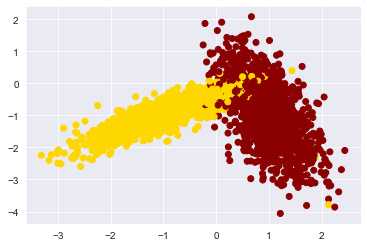

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
c_map = ListedColormap(['darkred', 'gold'])
sns.set_style('darkgrid')
plt.scatter(X_test[:,0], X_test[:,1], c = y_test, cmap = c_map )
plt.show()

## Implementing custom RandomsearchCV

In [32]:
# it will take classifier and set of values for hyper prameter in dict({hyper parmeter: [list of values]})
from sklearn.metrics import accuracy_score
import random 
from tqdm import tqdm

# creataing a function to randomly select 10 points from uniform distribution from a given range 
def rand_params_range_1_to_len(params_range):
    val = random.sample(range(1, params_range), 10)
    sorted_val = sorted(val)
    return sorted_val
# custom RandomSearchCV
def RandomSearchCV(x_train, y_train, classifier, params, folds):
    # for storing train and test scores
    trainscores = []
    testscores  = [] 
    
    # selecting numbers randomly from parameter range
    params_list = rand_params_range_1_to_len(params_range)
    # printing the random paramter values
    print(params_list)
    
    params = {'n_neighbors': params_list}
    
    for k in tqdm(params['n_neighbors']):
        # for storing train and test indices
        trainscores_folds = []
        testscores_folds  = []
        
        for i in range(0, folds): 
            # finding length
            num = (len(x_train) / (folds))
            
            #covert into integer values
            partition = int(num)
            
            # for test indices
            # range for calculating indices
            tst_range_indices = range((partition * i), (partition * (i + 1)))
            # creating a unique list for cross-validation
            tst_unique_fold = set(list(tst_range_indices))
            tst_indices=list(tst_unique_fold)
            
            # for train indices
            # rane for calculating indices
            trn_range_indices = range(0, len(x_train))
            # unique list for cross validation
            trn_unique_fold = set(list(trn_range_indices))
            # subtracting the test indices from traing unique fold to keep 2 groups for training
            # and 1 group for cross_validation
            trn_indices = list(trn_unique_fold - set(tst_indices))
            
            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[trn_indices]
            Y_train = y_train[trn_indices]
            X_test  = x_train[tst_indices]
            Y_test  = y_train[tst_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores, testscores, params

[4, 12, 17, 22, 24, 29, 32, 33, 42, 46]


100%|██████████████████████████████████████████| 10/10 [00:24<00:00,  2.54s/it]


{'n_neighbors': [4, 12, 17, 22, 24, 29, 32, 33, 42, 46]}
[0.9505333333333335, 0.9544, 0.9545333333333333, 0.9538666666666668, 0.9535999999999999, 0.9550666666666667, 0.9561333333333333, 0.9557333333333333, 0.956, 0.9561333333333334]
[0.9624666666666667, 0.9588666666666666, 0.9575333333333335, 0.9570666666666666, 0.9568, 0.9578000000000001, 0.9580000000000001, 0.9575999999999999, 0.9582, 0.9579333333333334]


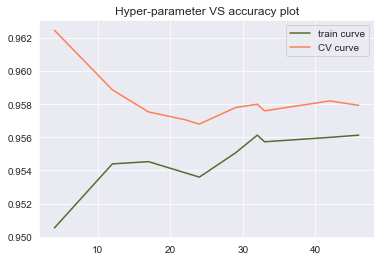

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
neigh = KNeighborsClassifier()
params_range = 50
folds = 3
testscores, trainscores, params = RandomSearchCV(X_train, y_train, neigh, params_range, folds)
print(params)
print(trainscores)
print(testscores)
sns.set_style('darkgrid')
plt.plot(params['n_neighbors'],trainscores, label='train curve', color = 'darkolivegreen')
plt.plot(params['n_neighbors'],testscores, label='CV curve', color = 'coral')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

#### Observation : 
From the above **Hyper_parameter VS accuarcy plot** it can be observed that in case of KNN classfier, for K = 33 *train accuracy* is 95.6% and *CV accuracy* is 95.8%. For K = 12 *train accuracy* is 95.42% but *CV accuracy* is 95.97%. The difference is higher than that of K = 33. So we can choose 33 as the optimal value of K.  

In [29]:

def plot_decision_boundary(X1, X2, y, clf):
    # Create color maps
    cmap_light = ListedColormap(['#BDB76B', '#DB7093', '#FFB6C1'])
    cmap_bold = ListedColormap(['#006400', '#D02090', '#C71585'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    sns.set_style('darkgrid')
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

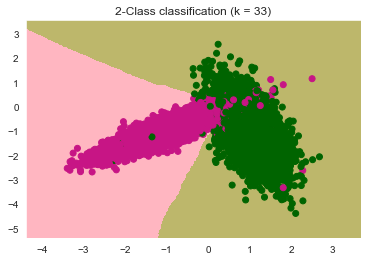

In [30]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 33)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)